In [1]:
#import numpy for numerical computing
import numpy as np

#import pandas for Dataframes
import pandas as pd

#Matplotlib for Visualization
from matplotlib import pyplot as plt

#for displaying graph in the notebook
%matplotlib inline

#
import seaborn as sns

#for compatibility with python 3 remove the # sign from below line
#from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv file
df=pd.read_csv('ABT.csv')

In [3]:
#check shape
df.shape

(148556, 11)

In [4]:
#check dtypes
df = df.drop(df.columns[0], axis=1)
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Job_Family_r         object
dtype: object

In [5]:
#check the initial 10 records 
df.head(5)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Job_Family_r
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,Management
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,Police Services
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,Police Services
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,Skilled Labor
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,Management


In [6]:
print(df['Job_Family_r'].unique().shape[0])
print(df['Job_Family_r'].unique())

54
['Management' 'Police Services' 'Skilled Labor'
 'Administrative & Mgmt (Unrep)' 'Fire Services'
 'Lab, Pharmacy & Med Techs' 'Journeyman Trade' 'Nursing' 'Legal & Court'
 'Port Operation' 'Medical & Dental' 'Street Transit'
 'Correction & Detention' 'Supervisory-Labor & Trade'
 'Pub Relations & Spec Assts' 'SF Superior Court'
 'Public Safety Inspection' 'Personnel' 'Sub-Professional Engineering'
 'Construction Project Mgmt' 'Information Systems'
 'Professional Engineering' 'Administrative-Labor & Trades'
 'Semi-Skilled & General Labor' 'Probation & Parole' 'Appraisal & Taxation'
 'Administrative-DPW/PUC' 'Revenue' 'Protection & Apprehension'
 'Construction Inspection' 'Public Health' 'Airport Operation'
 'Med Therapy & Auxiliary' 'Computer Operatns & Repro Svcs'
 'Energy & Environment' 'Property Administration'
 'Purchasing & Storekeeping' 'Human Services'
 'Health & Sanitation Inspection' 'Budget, Admn & Stats Analysis'
 'Payroll, Billing & Accounting' 'Clerical, Secretarial & Ste

# Box plots for basepay per job family

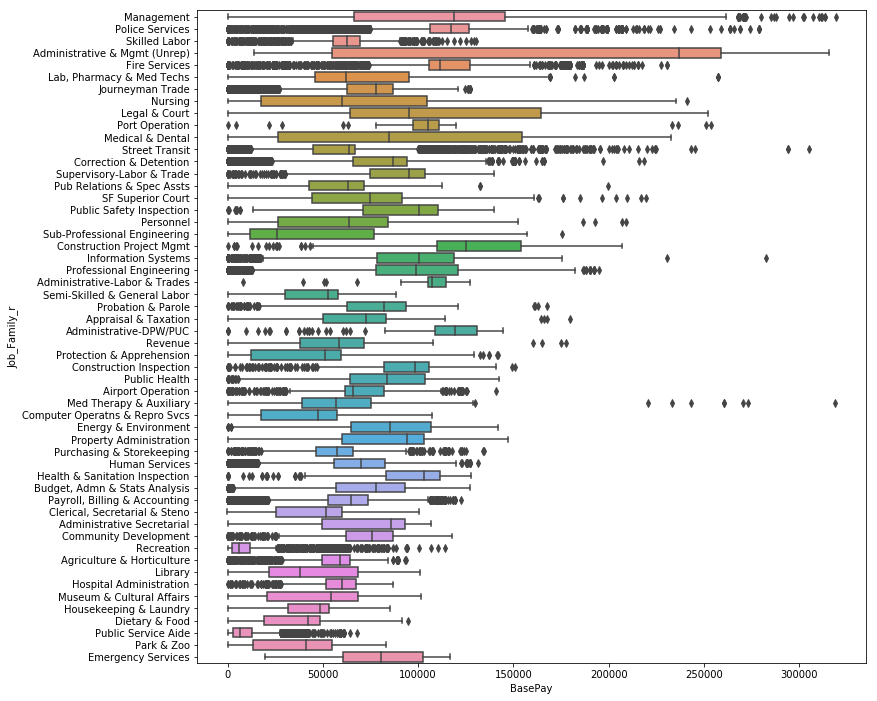

In [7]:
plt.figure(figsize=(12,12))
sns.boxplot(y='Job_Family_r', x='BasePay', data=df)

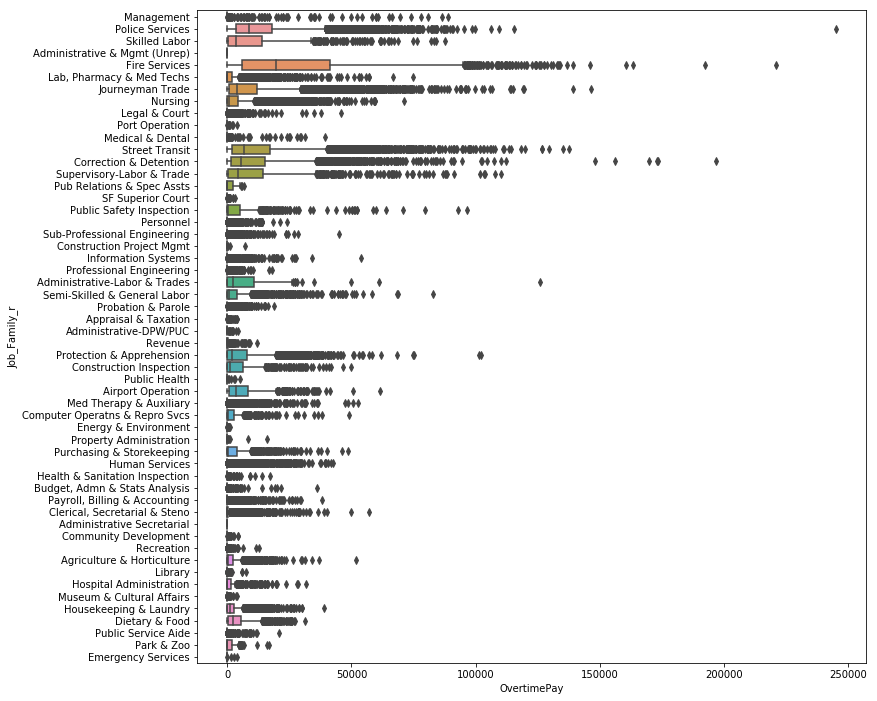

In [8]:
plt.figure(figsize=(12,12))
sns.boxplot(y='Job_Family_r', x='OvertimePay', data=df)

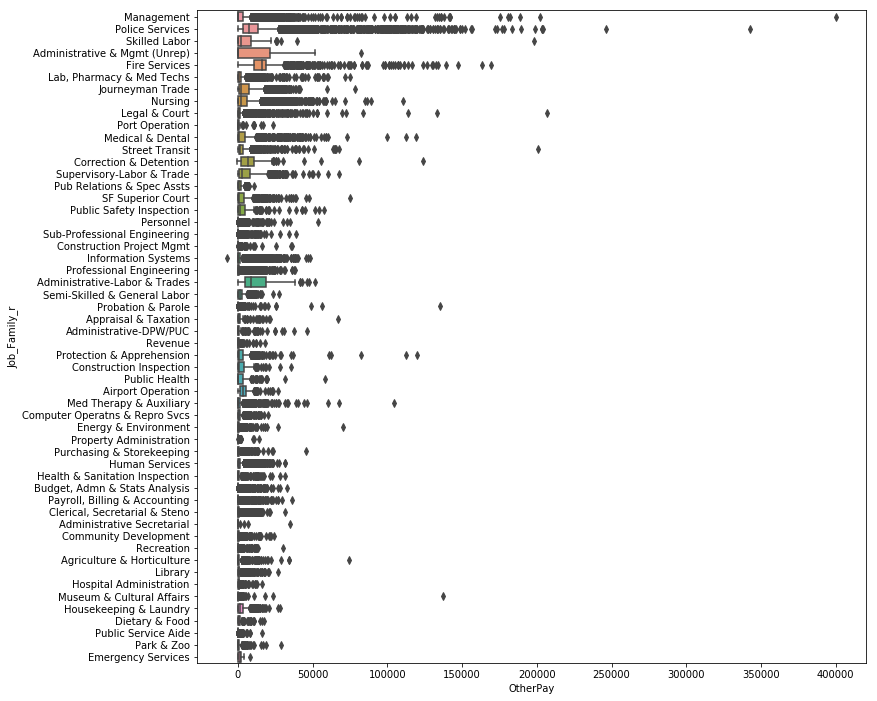

In [9]:
plt.figure(figsize=(12,12))
sns.boxplot(y='Job_Family_r', x='OtherPay', data=df)

In [10]:
# explicity genearting bins for finding distribution. 

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
labels = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000,]
df['labelBasePay'] = pd.cut(df['BasePay'], bins=bins, labels=labels)

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000]
labels = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000,]
df['labelOvertimePay'] = pd.cut(df['OvertimePay'], bins=bins, labels=labels)

bins = [0, 50000, 100000, 150000, 200000, 250000, 300000]
labels = [0, 50000, 100000, 150000, 200000, 250000]
df['labelOtherPay'] = pd.cut(df['OtherPay'], bins=bins, labels=labels)

In [11]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Job_Family_r,labelBasePay,labelOvertimePay,labelOtherPay
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,Management,150000,NaN,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,Police Services,150000,200000.0,100000.0
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,Police Services,200000,100000.0,0.0
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,Skilled Labor,50000,50000.0,150000.0
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,Management,100000,0.0,150000.0


# Frequency distribution of basepay with bin size = 50000

In [12]:
df_base_distribution = pd.crosstab(index=df["Job_Family_r"], 
                           columns=df["labelBasePay"])

In [13]:
df_base_distribution

labelBasePay,0,50000,100000,150000,200000,250000,300000
Job_Family_r,,,,,,,
Administrative & Mgmt (Unrep),3,2,0,0,4,5,1
Administrative Secretarial,11,29,2,0,0,0,0
Administrative-DPW/PUC,15,12,142,0,0,0,0
Administrative-Labor & Trades,2,11,75,0,0,0,0
Agriculture & Horticulture,387,1192,0,0,0,0,0
Airport Operation,131,878,114,0,0,0,0
Appraisal & Taxation,175,491,32,4,0,0,0
"Budget, Admn & Stats Analysis",607,2104,448,0,0,0,0
"Clerical, Secretarial & Steno",3181,3903,1,0,0,0,0


In [14]:
df_overtime_distribution = pd.crosstab(index=df["Job_Family_r"], 
                           columns=df["labelOvertimePay"])

In [15]:
df_overtime_distribution

labelOvertimePay,0,50000,100000,150000,200000
Job_Family_r,,,,,
Administrative & Mgmt (Unrep),0,0,0,0,0
Administrative Secretarial,0,0,0,0,0
Administrative-DPW/PUC,12,0,0,0,0
Administrative-Labor & Trades,56,1,1,0,0
Agriculture & Horticulture,936,1,0,0,0
Airport Operation,927,2,0,0,0
Appraisal & Taxation,43,0,0,0,0
"Budget, Admn & Stats Analysis",116,0,0,0,0
"Clerical, Secretarial & Steno",2680,1,0,0,0


In [16]:
df_otherpay_distribution = pd.crosstab(index=df["Job_Family_r"], 
                           columns=df["labelOtherPay"])

In [17]:
df_otherpay_distribution

labelOtherPay,0,50000,100000,150000,200000
Job_Family_r,,,,,
Administrative & Mgmt (Unrep),5,2,0,0,0
Administrative Secretarial,4,0,0,0,0
Administrative-DPW/PUC,47,0,0,0,0
Administrative-Labor & Trades,77,1,0,0,0
Agriculture & Horticulture,1299,1,0,0,0
Airport Operation,1027,0,0,0,0
Appraisal & Taxation,453,1,0,0,0
"Budget, Admn & Stats Analysis",578,0,0,0,0
"Clerical, Secretarial & Steno",3802,0,0,0,0
